In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
dat = pd.read_csv("D:/Python Proj/House_Price/train_house.csv")

In [3]:
dat

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
 dat.shape

(1460, 81)

In [5]:
dat.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
features_with_na = [features for features in dat.columns if dat[features].isnull().sum()>1]
## searching for null values



In [7]:
for feature in features_with_na:
    print(feature,np.round(dat[feature].isnull().mean(),4),'% missing values')

LotFrontage 0.1774 % missing values
Alley 0.9377 % missing values
MasVnrType 0.0055 % missing values
MasVnrArea 0.0055 % missing values
BsmtQual 0.0253 % missing values
BsmtCond 0.0253 % missing values
BsmtExposure 0.026 % missing values
BsmtFinType1 0.0253 % missing values
BsmtFinType2 0.026 % missing values
FireplaceQu 0.4726 % missing values
GarageType 0.0555 % missing values
GarageYrBlt 0.0555 % missing values
GarageFinish 0.0555 % missing values
GarageQual 0.0555 % missing values
GarageCond 0.0555 % missing values
PoolQC 0.9952 % missing values
Fence 0.8075 % missing values
MiscFeature 0.963 % missing values


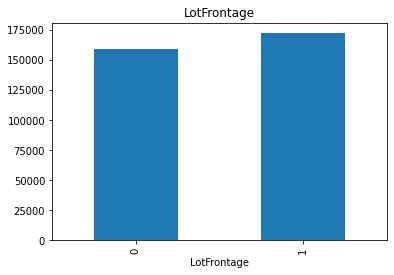

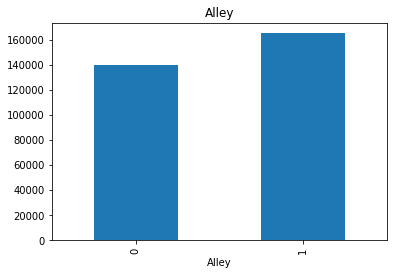

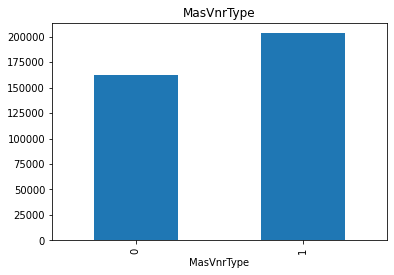

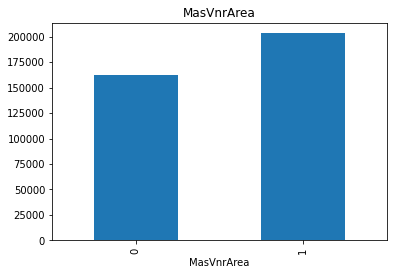

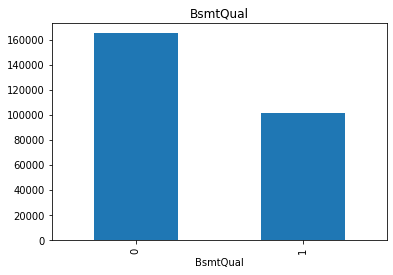

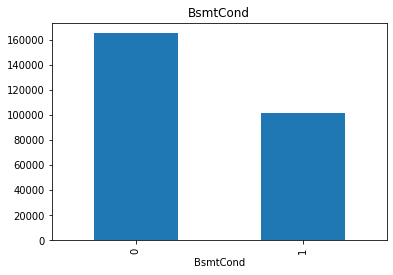

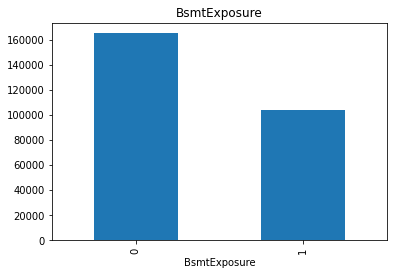

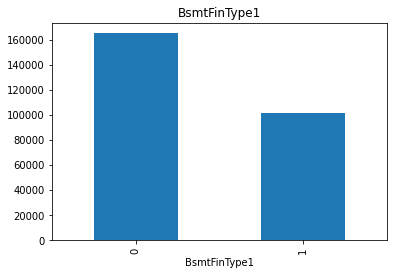

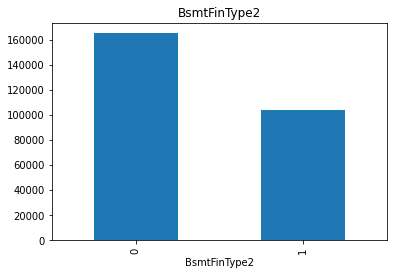

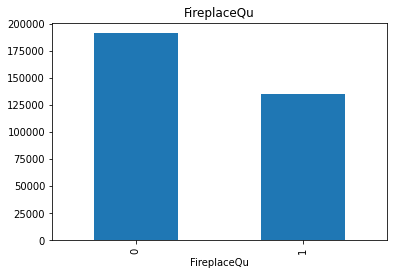

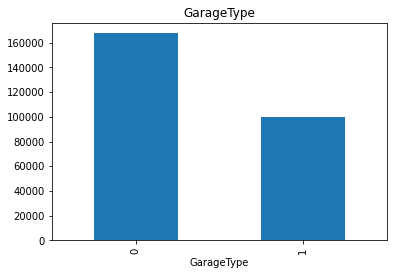

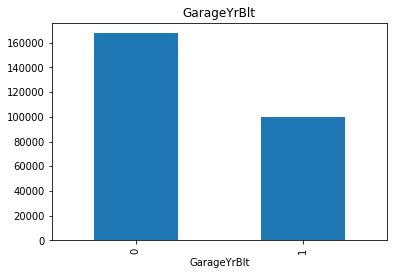

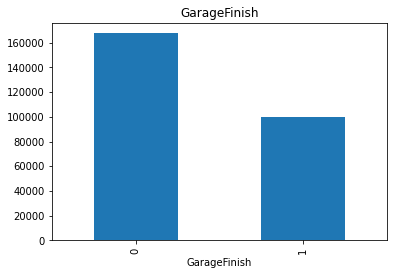

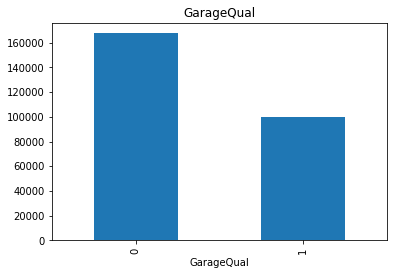

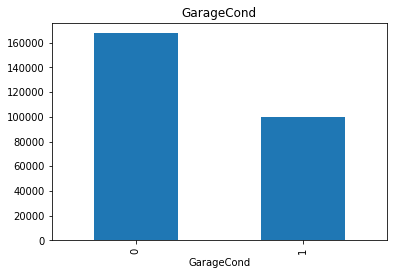

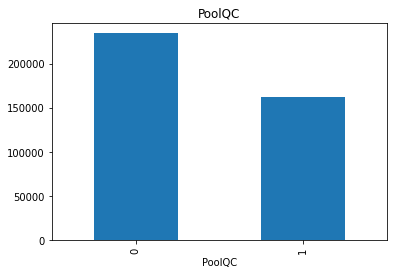

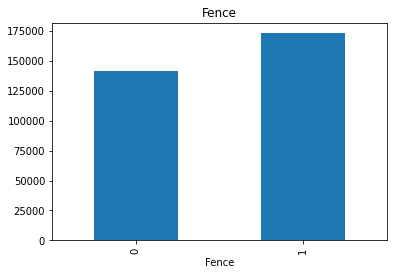

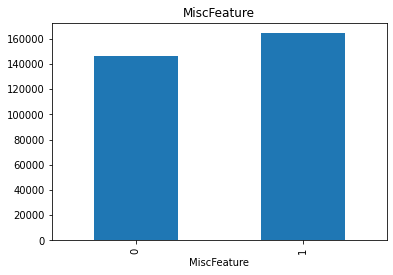

In [8]:
for feature in features_with_na:    ## To see how many missing values present in respective features 
    data_dup=dat.copy()             ## IF null then made it as 1 else 0

    data_dup[feature] =np.where(data_dup[feature].isnull(),1,0)

    data_dup.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [9]:
numerical_variables = [variables for variables in dat.columns if dat[variables].dtype !='O' ]   ## Getting numercial features

print('Number of numerical varibales',len(numerical_variables))

dat[numerical_variables].head()

Number of numerical varibales 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [10]:
feature_year = [features for features in numerical_variables if 'Yr' in features or 'Year' in features] # Feature containting Years Type

feature_year

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [11]:
for feature in feature_year:
    print(feature, dat[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'SalePrice vs YearSold')

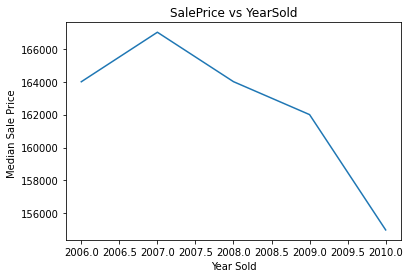

In [12]:
## Relationship between year sold and SalePrice

dat.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median Sale Price ')
plt.title('SalePrice vs YearSold')

In [13]:
##Price is decreasing. This cannot be true

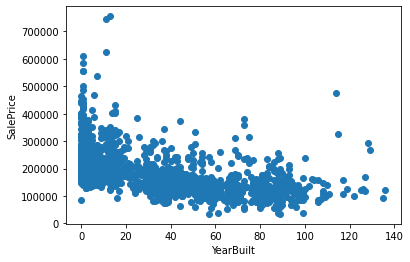

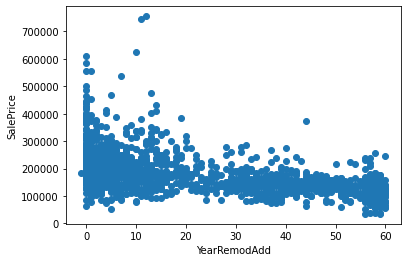

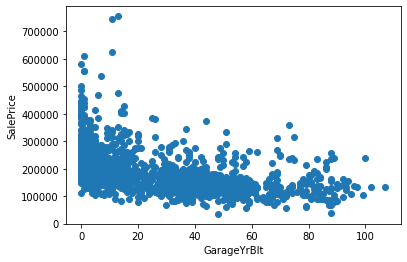

In [14]:
##Compare difference between year variables wih YrSold
for features in feature_year:
    if features != 'YrSold':
        data_dup2 = dat.copy()
        data_dup2[features] = data_dup2['YrSold'] - data_dup2[features]
        
        plt.scatter(data_dup2[features],data_dup2['SalePrice'])
        plt.xlabel(features)
        plt.ylabel('SalePrice')
        plt.show()

In [15]:
discrete_variables = [features for features in numerical_variables if len(dat[features].unique())< 25 and features not in feature_year +['Id']]
print("Discrete variables count: {}".format(len(discrete_variables)))             ## Finding Discrete features                                    

Discrete variables count: 17


In [16]:
discrete_variables

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

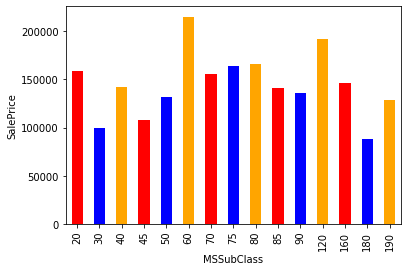

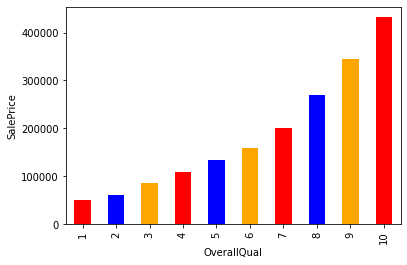

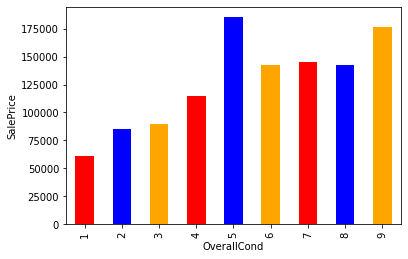

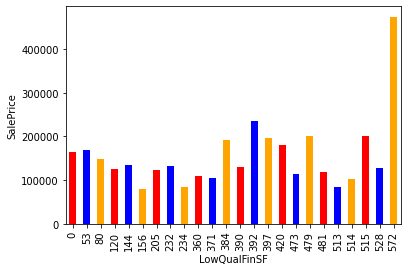

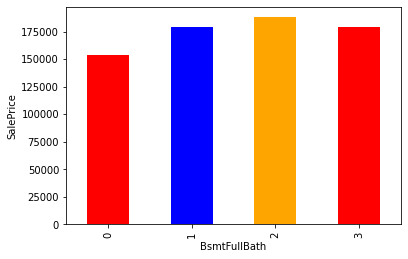

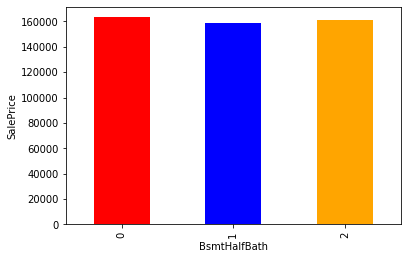

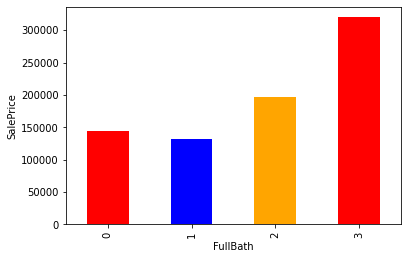

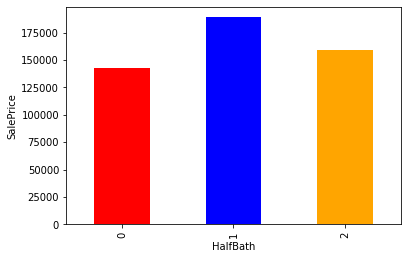

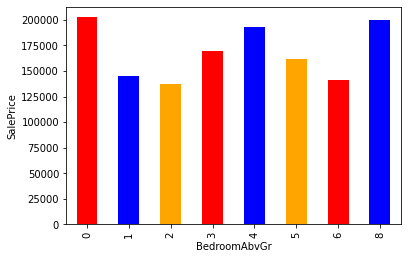

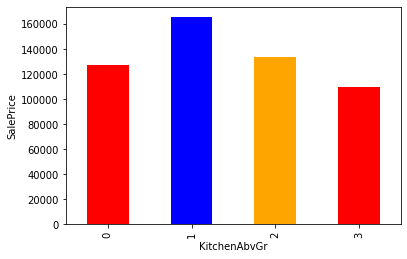

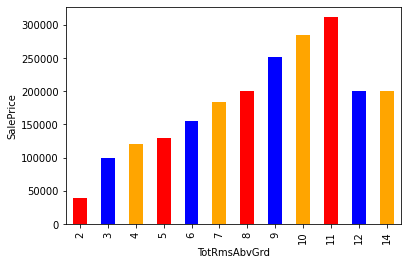

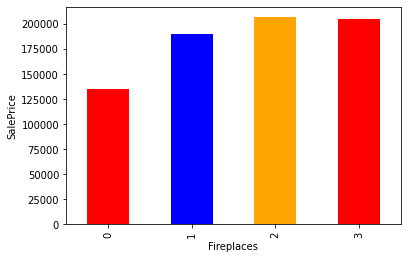

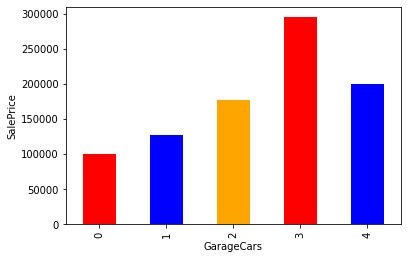

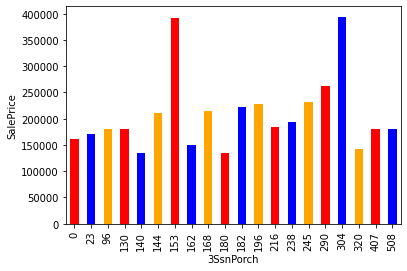

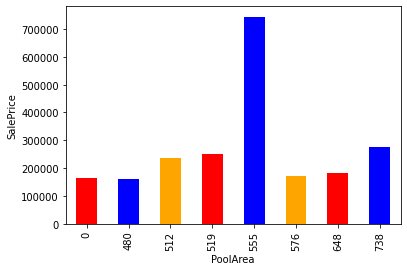

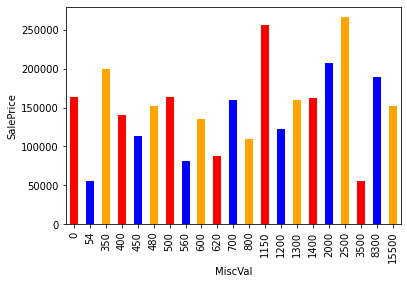

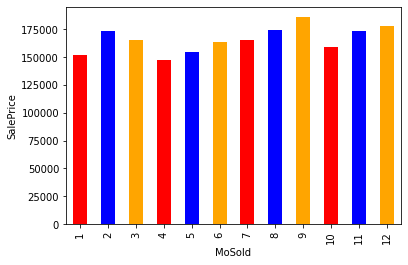

In [17]:
## Relationship between descrete variables and Sale Price

for features in discrete_variables:
    data_dup3 = dat.copy()
    data_dup3.groupby(features)['SalePrice'].median().plot.bar(color  =['red','blue','orange'])
    plt.xlabel(features)
    plt.ylabel('SalePrice')
    plt.show()

In [18]:
## Continuous Variables

continuous_variables = [features for features in numerical_variables if features not in discrete_variables + feature_year+ ['Id']]
print("Continuous variables count {}".format(len(continuous_variables)))


Continuous variables count 16


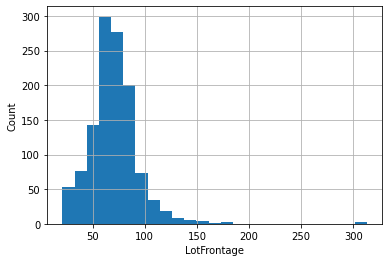

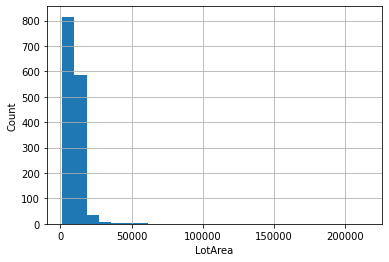

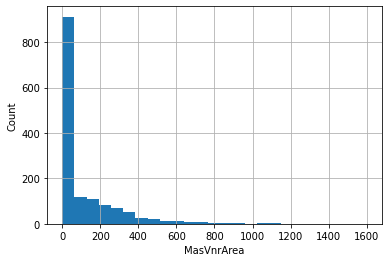

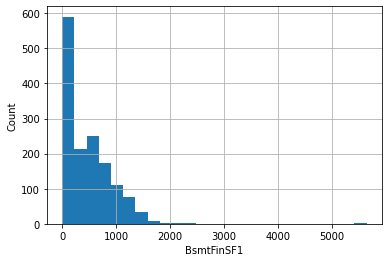

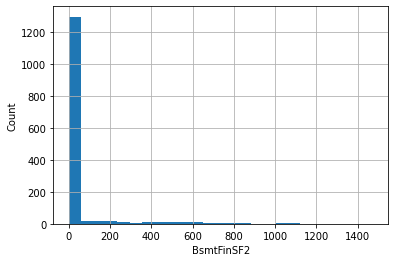

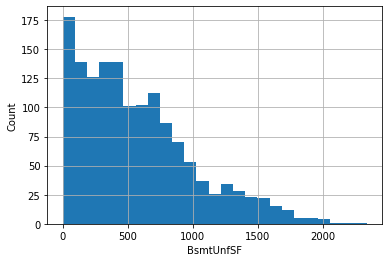

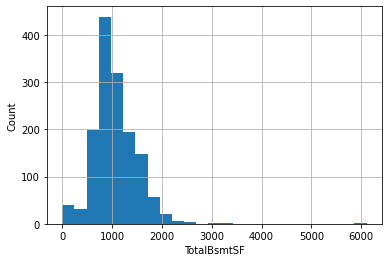

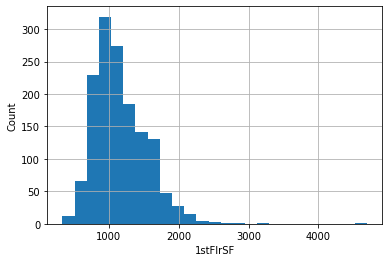

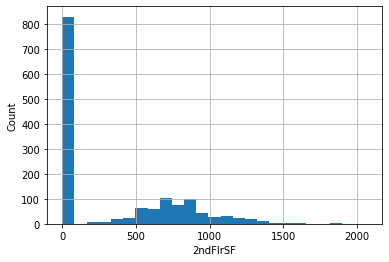

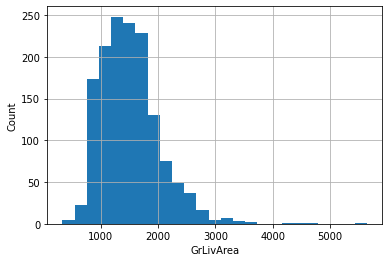

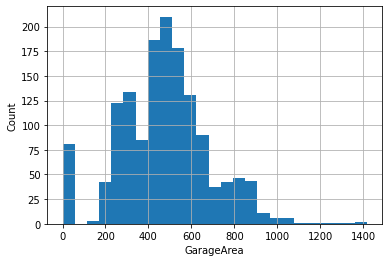

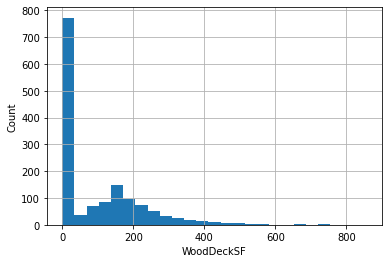

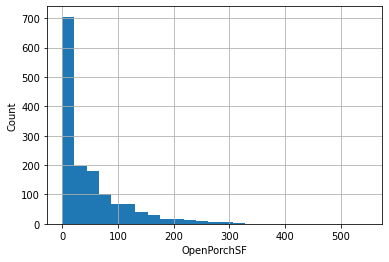

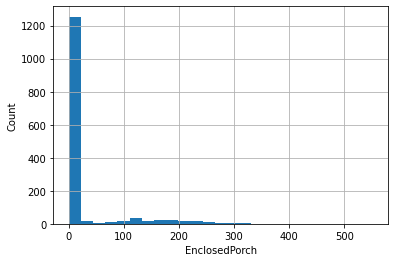

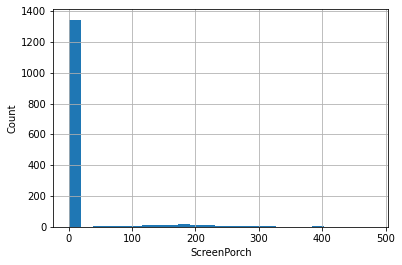

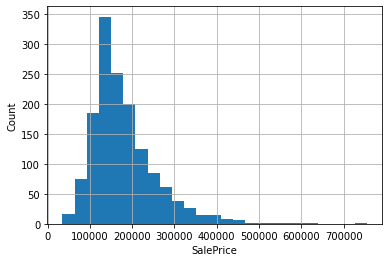

In [19]:
for features in continuous_variables: ## Finding Continuous features
    data_dup4 = dat.copy()
    data_dup4[features].hist(bins =25)
    plt.xlabel(features)
    plt.ylabel('Count')
    plt.show()

In [20]:
## Skewed data
## convert a non-guassian to gussian distribution


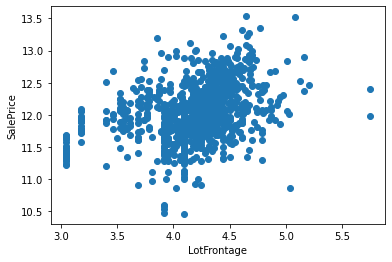

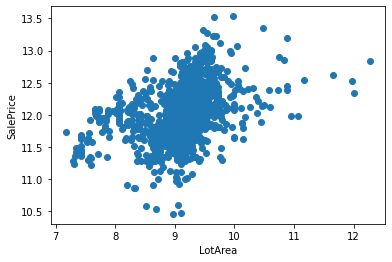

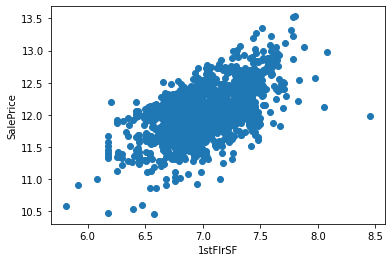

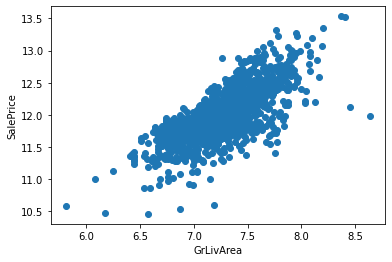

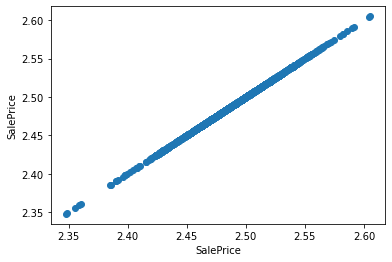

In [21]:

## logarithmic transoformation
for features in continuous_variables:
    data_dup5 = dat.copy()
    if 0 in data_dup5[features].unique():
        pass
    else:
        data_dup5[features] = np.log(data_dup5[features])
        data_dup5['SalePrice'] = np.log(data_dup5['SalePrice'])
        plt.scatter(data_dup5[features],data_dup5['SalePrice'])
        plt.xlabel(features)
        plt.ylabel('SalePrice')
        plt.show()

In [22]:
## postiive correlation


## Outliers



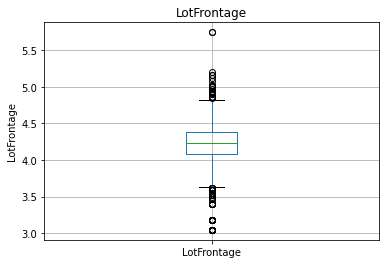

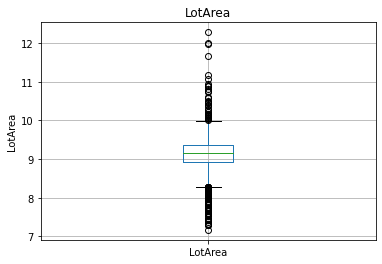

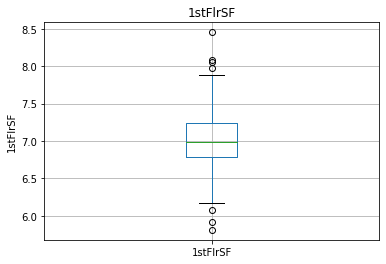

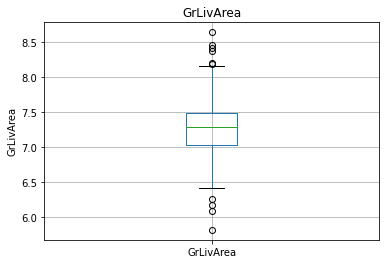

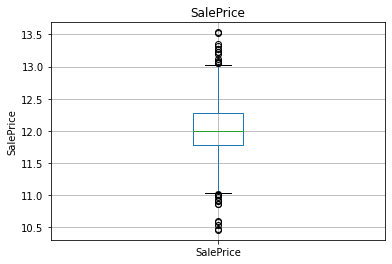

In [23]:
for features in continuous_variables:
    data_dup6 = dat.copy()
    if 0 in data_dup6[features].unique():
        pass
    else:
        data_dup6[features] = np.log(data_dup6[features])
        data_dup6.boxplot(column =features)
        plt.ylabel(features)
        plt.title(features)
        plt.show()
        

In [24]:
## Categorical features
categorical_variables = [features for features in dat.columns if dat[features].dtype=='O']
categorical_variables

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [25]:
dat[categorical_variables].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [26]:
for features in categorical_variables:           ## To see the how many categories present in categorical variables
    print("the variable is {} and number of variable are {}".format(features,len(dat[features].unique())) )

the variable is MSZoning and number of variable are 5
the variable is Street and number of variable are 2
the variable is Alley and number of variable are 3
the variable is LotShape and number of variable are 4
the variable is LandContour and number of variable are 4
the variable is Utilities and number of variable are 2
the variable is LotConfig and number of variable are 5
the variable is LandSlope and number of variable are 3
the variable is Neighborhood and number of variable are 25
the variable is Condition1 and number of variable are 9
the variable is Condition2 and number of variable are 8
the variable is BldgType and number of variable are 5
the variable is HouseStyle and number of variable are 8
the variable is RoofStyle and number of variable are 6
the variable is RoofMatl and number of variable are 8
the variable is Exterior1st and number of variable are 15
the variable is Exterior2nd and number of variable are 16
the variable is MasVnrType and number of variable are 5
the v

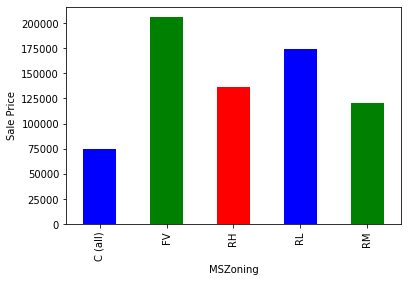

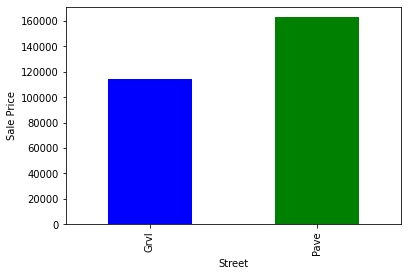

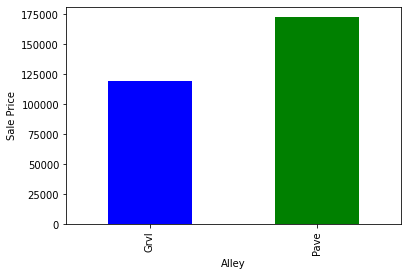

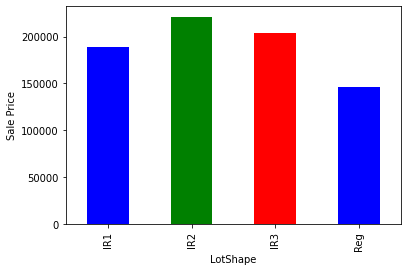

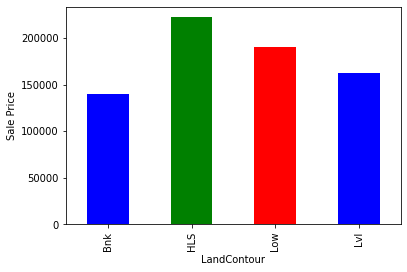

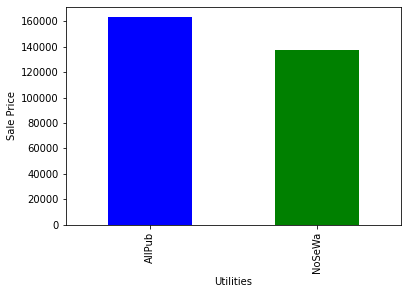

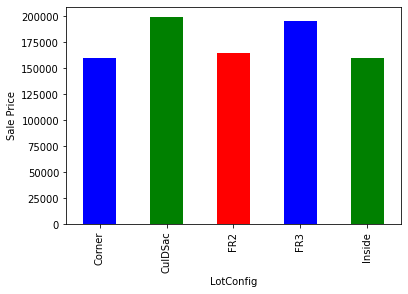

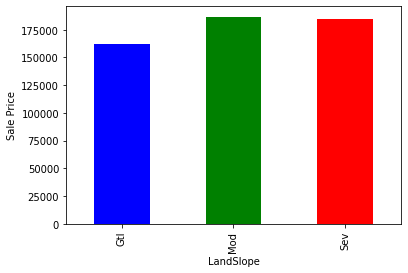

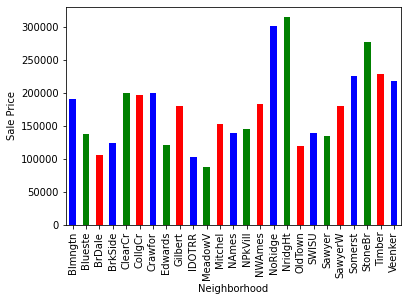

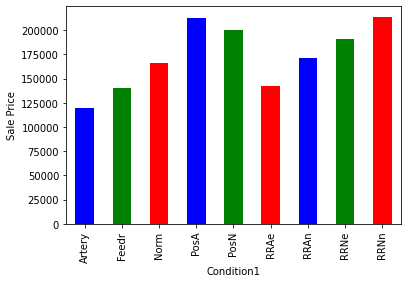

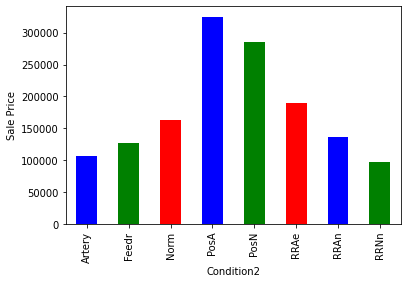

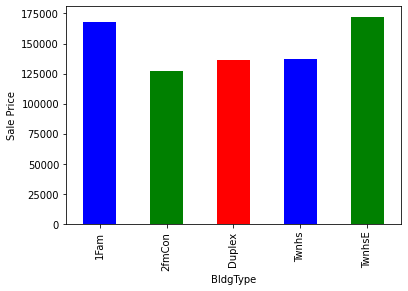

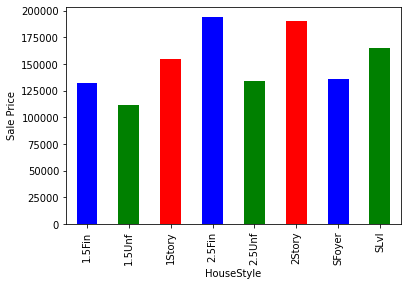

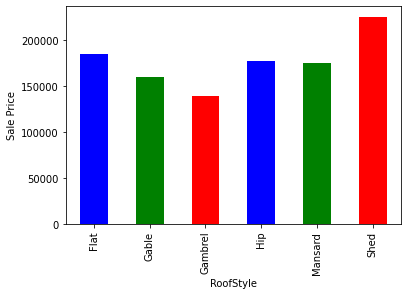

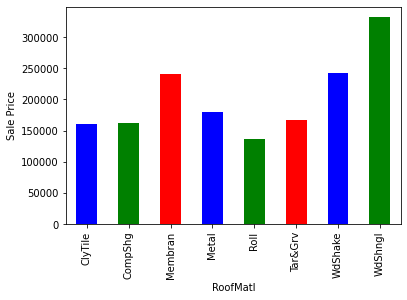

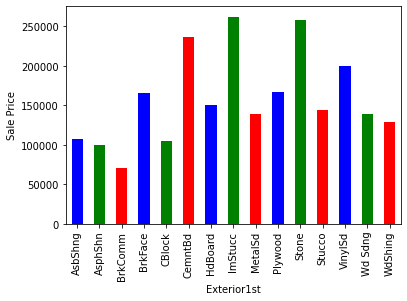

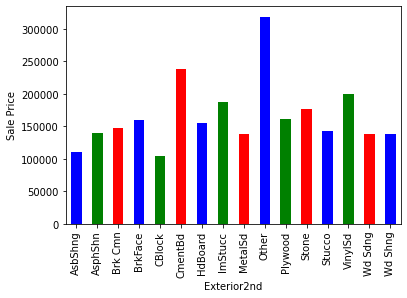

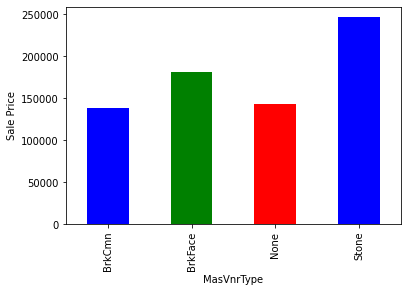

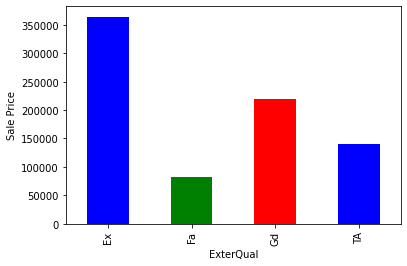

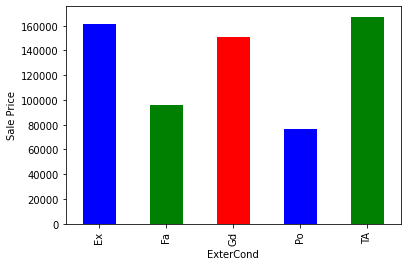

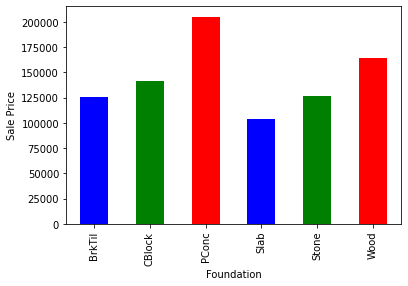

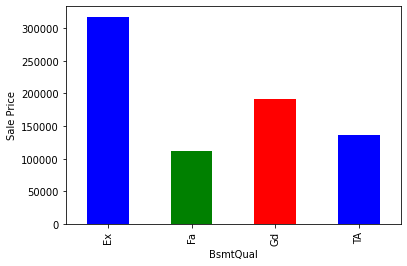

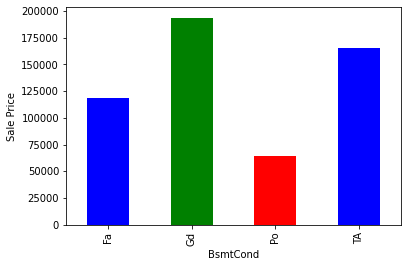

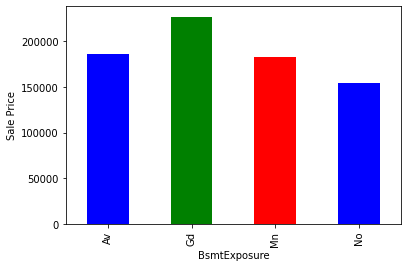

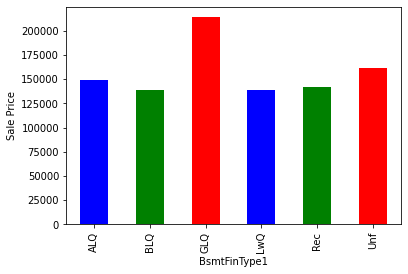

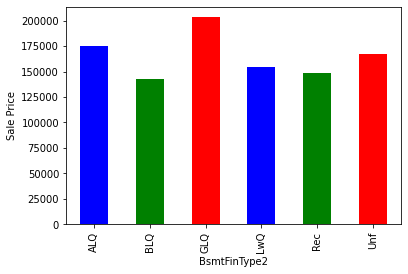

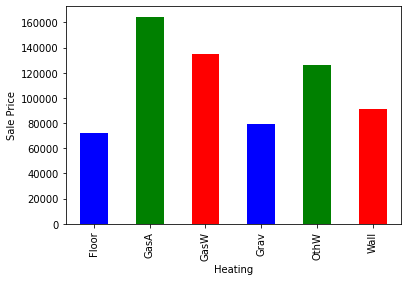

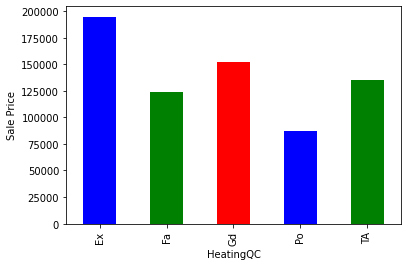

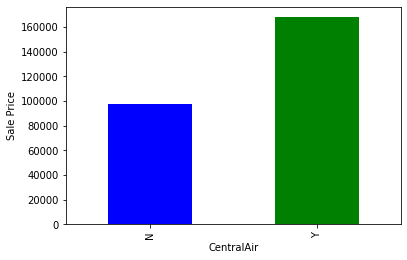

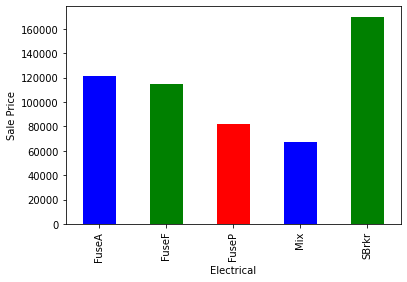

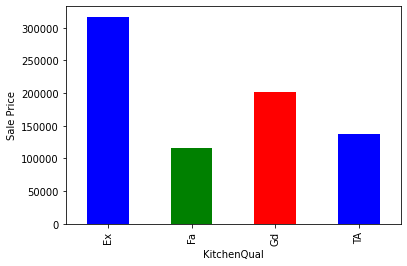

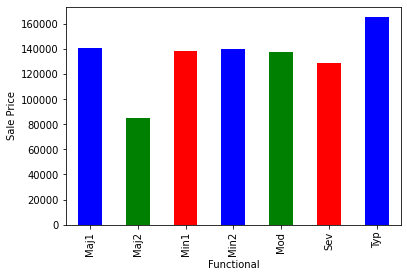

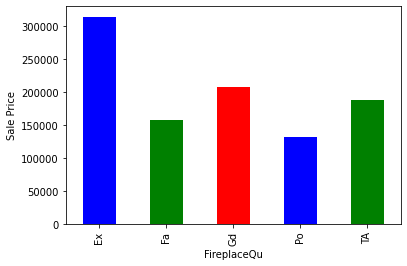

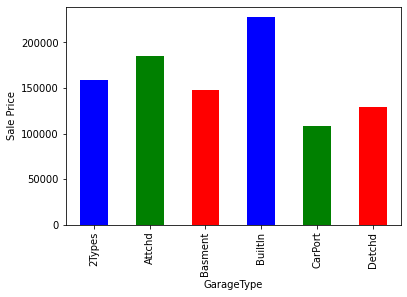

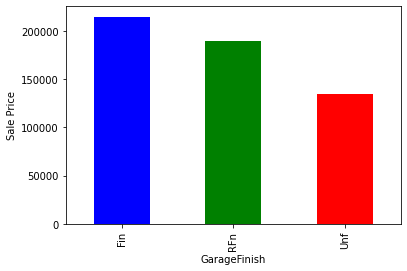

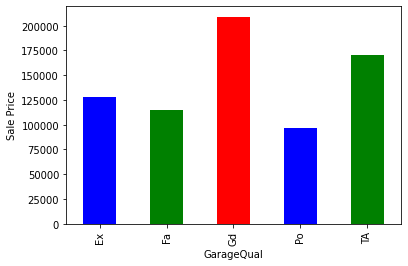

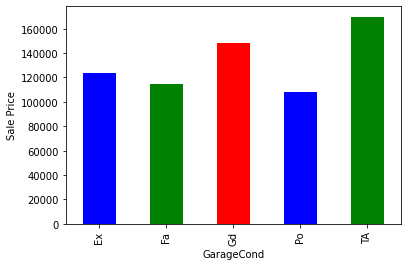

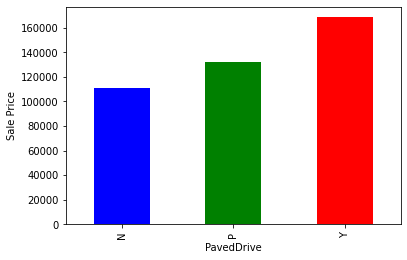

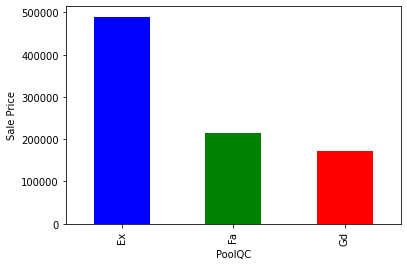

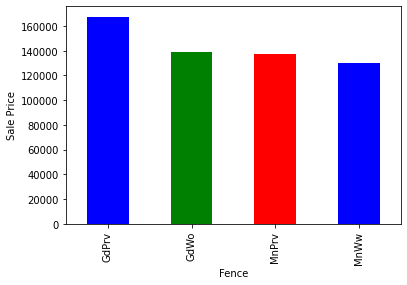

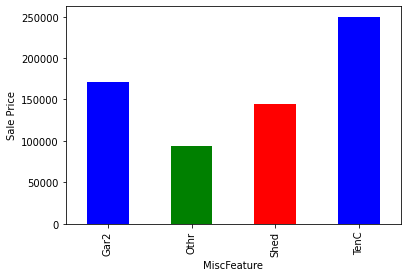

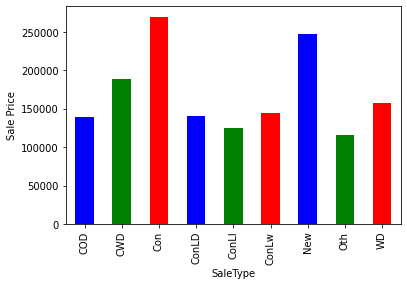

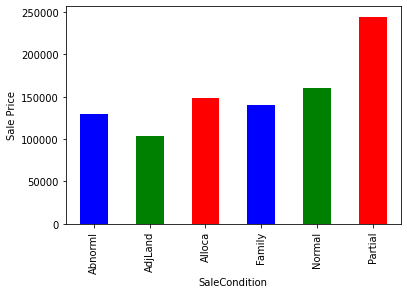

In [27]:
##Neighborhood variable has 25 variables
for features in categorical_variables:
    data_dup7 = dat.copy()
    data_dup7.groupby(features)['SalePrice'].median().plot.bar(color =['blue','green','red'] )
    plt.xlabel(features)
    plt.ylabel('Sale Price')
    plt.show()

## Feature Engineering

## Missing Values

In [28]:
## Null values in Categorical Variables
null_values =[features for features in dat.columns if dat[features].isnull().sum()>1 and dat[features].dtype =='O']

for features in null_values:
    print("{} :{}% missing values ".format(features,np.round(dat[features].isnull().mean(),4)*100))

Alley :93.77% missing values 
MasVnrType :0.5499999999999999% missing values 
BsmtQual :2.53% missing values 
BsmtCond :2.53% missing values 
BsmtExposure :2.6% missing values 
BsmtFinType1 :2.53% missing values 
BsmtFinType2 :2.6% missing values 
FireplaceQu :47.260000000000005% missing values 
GarageType :5.55% missing values 
GarageFinish :5.55% missing values 
GarageQual :5.55% missing values 
GarageCond :5.55% missing values 
PoolQC :99.52% missing values 
Fence :80.75% missing values 
MiscFeature :96.3% missing values 


In [29]:
## Replace missing values with label

def replace_null(dat,null_values):
    data_dup8 = dat.copy()
    data_dup8[null_values] = data_dup8[null_values].fillna('Missing')
    return data_dup8

dat = replace_null(dat,null_values)
dat[null_values].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [30]:
dat.Alley.head()

0    Missing
1    Missing
2    Missing
3    Missing
4    Missing
Name: Alley, dtype: object

In [31]:
numerical_null = [features for features in dat.columns if dat[features].isnull().sum()>1 and dat[features].dtype !='O']
numerical_null

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [32]:
for features in numerical_null:
    print("{}: {}% missing value".format(features,np.round(dat[features].isnull().mean(),4)*100))


LotFrontage: 17.740000000000002% missing value
MasVnrArea: 0.5499999999999999% missing value
GarageYrBlt: 5.55% missing value


In [33]:
## Replacing Numerical Null values with Median
for features in numerical_null:
    median_value = dat[features].median()
    
    dat[feature +'nan'] = np.where(dat[features].isnull(),1,0)
    dat[features].fillna(median_value,inplace = True)
dat[numerical_null].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [34]:
# Date Time Variables
for features in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    dat[features] = dat['YrSold']-dat[features]

In [35]:
dat[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


In [36]:
## Considering variables which does not have zero value in it

num_variables=['LotFrontage','LotArea','1stFlrSF','GrLivArea','SalePrice']

for features in num_variables:
    dat[features] = np.log(dat[features])

In [37]:
dat.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YrSoldnan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,...,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,...,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,...,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,...,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,...,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0


## Handling rare Categorical variables

In [38]:
## Remove categorical variables that are present less than 1% of the observations

categorical_rare_variables = [features for features in dat.columns if dat[features].dtype =='O']
categorical_rare_variables

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [39]:
for features in categorical_rare_variables:
    temp = dat.groupby(features)['SalePrice'].count()/len(dat)
    temp_df = temp[temp>0.01].index
    dat[features] = np.where(dat[features].isin(temp_df),dat[features],'Rare_var')
    

In [40]:
dat.head(150)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YrSoldnan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,...,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,...,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,...,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,...,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,...,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,160,RM,3.178054,7.832808,Pave,Missing,Reg,Lvl,AllPub,...,Missing,Missing,Missing,0,4,2006,WD,Normal,11.775290,0
146,147,30,RM,3.931826,8.719317,Pave,Missing,Reg,Lvl,AllPub,...,Missing,Missing,Missing,0,11,2009,WD,Normal,11.561716,0
147,148,60,RL,4.234107,9.159573,Pave,Missing,IR1,Lvl,AllPub,...,Missing,Missing,Missing,0,5,2010,WD,Normal,12.312682,0
148,149,20,RL,4.143135,8.922658,Pave,Missing,Reg,Lvl,AllPub,...,Missing,Missing,Missing,0,4,2008,WD,Normal,11.856515,1


In [41]:
for features in categorical_rare_variables:
    labels_ordered =dat.groupby([features])['SalePrice'].mean().sort_values().index
    labels_ordered = {k:i for i,k in enumerate(labels_ordered,0)}
    dat[features] = dat[features].map(labels_ordered)

## Feature Scaling

In [42]:
scaling_feature = [features for features in dat.columns if features not in ['Id','SalePrice']]

len(scaling_feature)

80

In [43]:
scaling_feature

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [44]:
variable_scaling = [features for features in dat.columns if features not in ['Id','SalePrice']]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(dat[variable_scaling])

MinMaxScaler()

In [45]:
datt =pd.concat([dat[['Id','SalePrice']].reset_index(drop = True),
                    pd.DataFrame(scaler.transform(dat[variable_scaling]),columns = variable_scaling)],
                    axis =1)

In [46]:
datt.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,YrSoldnan
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,...,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,...,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,...,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,...,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,...,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0


## Feature Selection 

In [47]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [48]:
y_train = datt[['SalePrice']]

In [49]:
x_train = datt.drop(['Id','SalePrice'],axis = 1)

In [50]:
## Lasso is used to penalize the high weighted variables
model_lasso = SelectFromModel(Lasso(alpha=0.005,random_state = 0))
model_lasso.fit(x_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [51]:
model_lasso.get_support()

array([ True,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False,  True,  True,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False])

In [52]:
selected_feat = x_train.columns[(model_lasso.get_support())]       ## Only selecting features which are not shrinking to zero


print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat))) 
print('features with coefficients shrank to zero: {}'.format(
    np.sum(model_lasso.estimator_.coef_ == 0)))

total features: 80
selected features: 21
features with coefficients shrank to zero: 59


In [53]:
selected_feat

Index(['MSSubClass', 'MSZoning', 'Neighborhood', 'OverallQual', 'YearRemodAdd',
       'RoofStyle', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'CentralAir',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'PavedDrive',
       'SaleCondition'],
      dtype='object')

In [54]:
x_train = x_train[selected_feat]

In [55]:
x_train.head()

,MSSubClass,MSZoning,Neighborhood,OverallQual,YearRemodAdd,RoofStyle,BsmtQual,BsmtExposure,HeatingQC,CentralAir,...,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,PavedDrive,SaleCondition
0,0.235294,0.75,0.636364,0.666667,0.098361,0.0,0.75,0.25,1.00,1.0,...,0.577712,0.333333,0.666667,0.000000,0.2,0.8,0.666667,0.50,1.0,0.75
1,0.000000,0.75,0.500000,0.555556,0.524590,0.0,0.75,1.00,1.00,1.0,...,0.470245,0.000000,0.333333,0.333333,0.6,0.8,0.666667,0.50,1.0,0.75
2,0.235294,0.75,0.636364,0.666667,0.114754,0.0,0.75,0.50,1.00,1.0,...,0.593095,0.333333,0.666667,0.333333,0.6,0.8,0.666667,0.50,1.0,0.75
3,0.294118,0.75,0.727273,0.666667,0.606557,0.0,0.50,0.25,0.75,1.0,...,0.579157,0.333333,0.666667,0.333333,0.8,0.4,0.333333,0.75,1.0,0.00
4,0.235294,0.75,1.000000,0.777778,0.147541,0.0,0.75,0.75,1.00,1.0,...,0.666523,0.333333,0.666667,0.333333,0.6,0.8,0.666667,0.75,1.0,0.75


In [56]:
x_train.corr()

,MSSubClass,MSZoning,Neighborhood,OverallQual,YearRemodAdd,RoofStyle,BsmtQual,BsmtExposure,HeatingQC,CentralAir,...,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,PavedDrive,SaleCondition
MSSubClass,1.000000,-0.211535,-0.024106,0.032628,-0.041968,-0.135084,0.060184,0.051150,-0.019458,-0.101774,...,0.081717,0.003491,-0.012383,-0.045569,-0.039267,-0.108335,-0.033077,-0.040110,-0.059925,-0.029423
MSZoning,-0.211535,1.000000,0.553530,0.269302,-0.240519,0.054911,0.243081,0.086154,0.199776,0.254369,...,0.192957,0.120119,0.247010,0.170517,0.169354,0.342100,0.285038,0.253433,0.289688,0.124343
Neighborhood,-0.024106,0.553530,1.000000,0.672442,-0.524562,0.115438,0.607629,0.273926,0.425708,0.266575,...,0.451060,0.138124,0.568422,0.317493,0.397768,0.501436,0.535214,0.573602,0.295461,0.209018
OverallQual,0.032628,0.269302,0.672442,1.000000,-0.552570,0.172857,0.660767,0.296517,0.457083,0.272038,...,0.614210,0.111098,0.673331,0.396765,0.500749,0.495281,0.556863,0.600671,0.229393,0.214590
YearRemodAdd,-0.041968,-0.240519,-0.524562,-0.552570,1.000000,-0.024536,-0.548990,-0.225577,-0.550765,-0.299553,...,-0.313528,-0.115183,-0.625328,-0.114158,-0.206572,-0.359943,-0.444549,-0.423236,-0.168074,-0.241391
RoofStyle,-0.135084,0.054911,0.115438,0.172857,-0.024536,1.000000,0.073212,0.072342,0.021651,0.015223,...,0.135633,0.105542,0.097786,0.142942,0.163129,0.106319,0.132926,0.135697,0.020822,0.054253
BsmtQual,0.060184,0.243081,0.607629,0.660767,-0.548990,0.073212,1.000000,0.396620,0.417721,0.268529,...,0.366459,0.223106,0.545691,0.239269,0.330247,0.429149,0.515933,0.486005,0.260308,0.213296
BsmtExposure,0.051150,0.086154,0.273926,0.296517,-0.225577,0.072342,0.396620,1.000000,0.150852,0.129770,...,0.113022,0.338672,0.254707,0.186291,0.166354,0.213335,0.251367,0.252830,0.115508,0.083471
HeatingQC,-0.019458,0.199776,0.425708,0.457083,-0.550765,0.021651,0.417721,0.150852,1.000000,0.306294,...,0.272837,0.083735,0.504228,0.129689,0.219840,0.300065,0.392244,0.325347,0.157502,0.186986
CentralAir,-0.101774,0.254369,0.266575,0.272038,-0.299553,0.015223,0.268529,0.129770,0.306294,1.000000,...,0.129786,0.114603,0.257830,0.186309,0.175590,0.356785,0.283124,0.233726,0.337516,0.074311


In [57]:
x_train.dtypes

MSSubClass       float64
MSZoning         float64
Neighborhood     float64
OverallQual      float64
YearRemodAdd     float64
RoofStyle        float64
BsmtQual         float64
BsmtExposure     float64
HeatingQC        float64
CentralAir       float64
1stFlrSF         float64
GrLivArea        float64
BsmtFullBath     float64
KitchenQual      float64
Fireplaces       float64
FireplaceQu      float64
GarageType       float64
GarageFinish     float64
GarageCars       float64
PavedDrive       float64
SaleCondition    float64
dtype: object

In [58]:
x_train

,MSSubClass,MSZoning,Neighborhood,OverallQual,YearRemodAdd,RoofStyle,BsmtQual,BsmtExposure,HeatingQC,CentralAir,...,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,PavedDrive,SaleCondition
0,0.235294,0.75,0.636364,0.666667,0.098361,0.0,0.75,0.25,1.00,1.0,...,0.577712,0.333333,0.666667,0.000000,0.2,0.8,0.666667,0.50,1.0,0.75
1,0.000000,0.75,0.500000,0.555556,0.524590,0.0,0.75,1.00,1.00,1.0,...,0.470245,0.000000,0.333333,0.333333,0.6,0.8,0.666667,0.50,1.0,0.75
2,0.235294,0.75,0.636364,0.666667,0.114754,0.0,0.75,0.50,1.00,1.0,...,0.593095,0.333333,0.666667,0.333333,0.6,0.8,0.666667,0.50,1.0,0.75
3,0.294118,0.75,0.727273,0.666667,0.606557,0.0,0.50,0.25,0.75,1.0,...,0.579157,0.333333,0.666667,0.333333,0.8,0.4,0.333333,0.75,1.0,0.00
4,0.235294,0.75,1.000000,0.777778,0.147541,0.0,0.75,0.75,1.00,1.0,...,0.666523,0.333333,0.666667,0.333333,0.6,0.8,0.666667,0.75,1.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.75,0.590909,0.555556,0.131148,0.0,0.75,0.25,1.00,1.0,...,0.564433,0.000000,0.333333,0.333333,0.6,0.8,0.666667,0.50,1.0,0.75
1456,0.000000,0.75,0.545455,0.555556,0.377049,0.0,0.75,0.25,0.50,1.0,...,0.645810,0.333333,0.333333,0.666667,0.6,0.8,0.333333,0.50,1.0,0.75
1457,0.294118,0.75,0.727273,0.666667,0.081967,0.0,0.50,0.25,1.00,1.0,...,0.688669,0.000000,0.666667,0.666667,0.8,0.8,0.666667,0.25,1.0,0.75
1458,0.000000,0.75,0.363636,0.444444,0.245902,1.0,0.50,0.50,0.75,1.0,...,0.414497,0.333333,0.666667,0.000000,0.2,0.8,0.333333,0.25,1.0,0.75


In [59]:
y_train

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216
...,...
1455,12.072541
1456,12.254863
1457,12.493130
1458,11.864462


## OLS Method

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x_train,y_train,test_size = 0.3)

In [61]:
import statsmodels.api as sm

In [62]:
ols_model = sm.OLS(Y_train,X_train)

In [63]:
result = ols_model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              6470.
Date:                Mon, 05 Oct 2020   Prob (F-statistic):                        0.00
Time:                        00:10:03   Log-Likelihood:                         -1479.2
No. Observations:                1022   AIC:                                      3000.
Df Residuals:                    1001   BIC:                                      3104.
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

## Inference
1. GarageType type corelates with two other variables and we can see it has a p-value of 0.973 which is very high(p<0.05)
2. BsmtFullBath also has a high p-value 

In [64]:
X_train1 = X_train.drop('GarageType',axis = 1)

In [65]:
X_train1

,MSSubClass,MSZoning,Neighborhood,OverallQual,YearRemodAdd,RoofStyle,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageFinish,GarageCars,PavedDrive,SaleCondition
495,0.058824,0.00,0.000000,0.333333,0.983607,0.0,0.50,0.25,0.50,0.0,0.290679,0.271719,0.000000,0.333333,0.000000,0.2,0.000000,0.00,0.0,0.00
226,0.235294,0.75,1.000000,0.666667,0.213115,0.0,0.75,0.25,1.00,1.0,0.488381,0.714884,0.000000,0.666667,0.333333,0.6,0.666667,0.75,1.0,0.00
1397,0.294118,0.25,0.136364,0.444444,0.065574,0.0,0.50,0.50,1.00,1.0,0.391177,0.534414,0.000000,0.333333,0.000000,0.2,0.333333,0.25,0.0,0.75
1440,0.294118,0.75,0.727273,0.555556,0.245902,0.0,1.00,0.25,0.25,1.0,0.548494,0.719764,0.000000,0.333333,0.333333,0.8,1.000000,0.50,1.0,0.75
401,0.000000,0.75,0.636364,0.666667,0.032787,0.0,0.75,0.75,1.00,1.0,0.517183,0.483450,0.000000,0.666667,0.333333,0.8,1.000000,0.50,1.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,0.058824,0.75,0.181818,0.444444,0.934426,1.0,0.50,0.25,1.00,1.0,0.461247,0.431162,0.333333,0.333333,0.333333,0.8,0.333333,0.50,1.0,0.75
1412,0.411765,0.75,0.363636,0.333333,0.983607,0.0,0.00,0.00,0.25,0.0,0.429838,0.401802,0.000000,0.333333,0.000000,0.2,0.333333,0.50,1.0,0.75
452,0.235294,0.75,0.863636,0.555556,0.180328,1.0,1.00,0.25,1.00,1.0,0.370044,0.587103,0.333333,0.333333,0.000000,0.2,1.000000,0.50,1.0,0.75
976,0.058824,0.75,0.136364,0.333333,0.803279,0.0,0.75,0.25,0.50,1.0,0.361859,0.338257,0.000000,0.000000,0.000000,0.2,0.000000,0.00,1.0,0.75


In [66]:
X_train2 = X_train1.drop('BsmtFullBath',axis = 1)

In [67]:
X_train2

,MSSubClass,MSZoning,Neighborhood,OverallQual,YearRemodAdd,RoofStyle,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,KitchenQual,Fireplaces,FireplaceQu,GarageFinish,GarageCars,PavedDrive,SaleCondition
495,0.058824,0.00,0.000000,0.333333,0.983607,0.0,0.50,0.25,0.50,0.0,0.290679,0.271719,0.333333,0.000000,0.2,0.000000,0.00,0.0,0.00
226,0.235294,0.75,1.000000,0.666667,0.213115,0.0,0.75,0.25,1.00,1.0,0.488381,0.714884,0.666667,0.333333,0.6,0.666667,0.75,1.0,0.00
1397,0.294118,0.25,0.136364,0.444444,0.065574,0.0,0.50,0.50,1.00,1.0,0.391177,0.534414,0.333333,0.000000,0.2,0.333333,0.25,0.0,0.75
1440,0.294118,0.75,0.727273,0.555556,0.245902,0.0,1.00,0.25,0.25,1.0,0.548494,0.719764,0.333333,0.333333,0.8,1.000000,0.50,1.0,0.75
401,0.000000,0.75,0.636364,0.666667,0.032787,0.0,0.75,0.75,1.00,1.0,0.517183,0.483450,0.666667,0.333333,0.8,1.000000,0.50,1.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,0.058824,0.75,0.181818,0.444444,0.934426,1.0,0.50,0.25,1.00,1.0,0.461247,0.431162,0.333333,0.333333,0.8,0.333333,0.50,1.0,0.75
1412,0.411765,0.75,0.363636,0.333333,0.983607,0.0,0.00,0.00,0.25,0.0,0.429838,0.401802,0.333333,0.000000,0.2,0.333333,0.50,1.0,0.75
452,0.235294,0.75,0.863636,0.555556,0.180328,1.0,1.00,0.25,1.00,1.0,0.370044,0.587103,0.333333,0.000000,0.2,1.000000,0.50,1.0,0.75
976,0.058824,0.75,0.136364,0.333333,0.803279,0.0,0.75,0.25,0.50,1.0,0.361859,0.338257,0.000000,0.000000,0.2,0.000000,0.00,1.0,0.75


In [68]:
X_train2.corr()

,MSSubClass,MSZoning,Neighborhood,OverallQual,YearRemodAdd,RoofStyle,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,KitchenQual,Fireplaces,FireplaceQu,GarageFinish,GarageCars,PavedDrive,SaleCondition
MSSubClass,1.000000,-0.233147,-0.034299,0.034584,-0.045599,-0.151746,0.076296,0.087031,-0.008866,-0.074552,-0.283594,0.071740,-0.012215,-0.062367,-0.068230,-0.024929,-0.043931,-0.036665,-0.037513
MSZoning,-0.233147,1.000000,0.559965,0.271183,-0.238949,0.074592,0.242545,0.062746,0.189523,0.238000,0.270799,0.196064,0.230517,0.163017,0.158469,0.274727,0.275897,0.250619,0.141447
Neighborhood,-0.034299,0.559965,1.000000,0.647064,-0.506785,0.125195,0.594754,0.240736,0.409515,0.249831,0.387448,0.427214,0.545193,0.300221,0.365831,0.521354,0.560311,0.287188,0.220472
OverallQual,0.034584,0.271183,0.647064,1.000000,-0.537703,0.183407,0.653009,0.280197,0.446253,0.279757,0.456771,0.604226,0.655701,0.409406,0.491109,0.535631,0.576752,0.274986,0.215732
YearRemodAdd,-0.045599,-0.238949,-0.506785,-0.537703,1.000000,-0.043009,-0.535433,-0.209322,-0.546012,-0.310119,-0.216977,-0.280637,-0.607211,-0.086777,-0.174634,-0.436009,-0.400196,-0.171015,-0.240250
RoofStyle,-0.151746,0.074592,0.125195,0.183407,-0.043009,1.000000,0.077847,0.075391,0.048147,0.040003,0.310727,0.143589,0.107093,0.152562,0.166502,0.144071,0.139496,0.043924,0.050110
BsmtQual,0.076296,0.242545,0.594754,0.653009,-0.535433,0.077847,1.000000,0.402371,0.414741,0.258503,0.276283,0.337763,0.547763,0.224850,0.317388,0.499446,0.450906,0.254536,0.216032
BsmtExposure,0.087031,0.062746,0.240736,0.280197,-0.209322,0.075391,0.402371,1.000000,0.148668,0.128730,0.264015,0.115112,0.246518,0.176994,0.146555,0.250018,0.208917,0.105946,0.077276
HeatingQC,-0.008866,0.189523,0.409515,0.446253,-0.546012,0.048147,0.414741,0.148668,1.000000,0.286493,0.185586,0.240734,0.504153,0.124206,0.198196,0.367856,0.334247,0.161336,0.170427
CentralAir,-0.074552,0.238000,0.249831,0.279757,-0.310119,0.040003,0.258503,0.128730,0.286493,1.000000,0.146268,0.125390,0.254958,0.180484,0.169102,0.281835,0.263175,0.334919,0.083430


In [69]:
ols_model = sm.OLS(Y_train,X_train2)
result = ols_model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              7165.
Date:                Mon, 05 Oct 2020   Prob (F-statistic):                        0.00
Time:                        00:10:05   Log-Likelihood:                         -1479.2
No. Observations:                1022   AIC:                                      2996.
Df Residuals:                    1003   BIC:                                      3090.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [70]:
X_train = X_train2

In [71]:
X_train

,MSSubClass,MSZoning,Neighborhood,OverallQual,YearRemodAdd,RoofStyle,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,KitchenQual,Fireplaces,FireplaceQu,GarageFinish,GarageCars,PavedDrive,SaleCondition
495,0.058824,0.00,0.000000,0.333333,0.983607,0.0,0.50,0.25,0.50,0.0,0.290679,0.271719,0.333333,0.000000,0.2,0.000000,0.00,0.0,0.00
226,0.235294,0.75,1.000000,0.666667,0.213115,0.0,0.75,0.25,1.00,1.0,0.488381,0.714884,0.666667,0.333333,0.6,0.666667,0.75,1.0,0.00
1397,0.294118,0.25,0.136364,0.444444,0.065574,0.0,0.50,0.50,1.00,1.0,0.391177,0.534414,0.333333,0.000000,0.2,0.333333,0.25,0.0,0.75
1440,0.294118,0.75,0.727273,0.555556,0.245902,0.0,1.00,0.25,0.25,1.0,0.548494,0.719764,0.333333,0.333333,0.8,1.000000,0.50,1.0,0.75
401,0.000000,0.75,0.636364,0.666667,0.032787,0.0,0.75,0.75,1.00,1.0,0.517183,0.483450,0.666667,0.333333,0.8,1.000000,0.50,1.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,0.058824,0.75,0.181818,0.444444,0.934426,1.0,0.50,0.25,1.00,1.0,0.461247,0.431162,0.333333,0.333333,0.8,0.333333,0.50,1.0,0.75
1412,0.411765,0.75,0.363636,0.333333,0.983607,0.0,0.00,0.00,0.25,0.0,0.429838,0.401802,0.333333,0.000000,0.2,0.333333,0.50,1.0,0.75
452,0.235294,0.75,0.863636,0.555556,0.180328,1.0,1.00,0.25,1.00,1.0,0.370044,0.587103,0.333333,0.000000,0.2,1.000000,0.50,1.0,0.75
976,0.058824,0.75,0.136364,0.333333,0.803279,0.0,0.75,0.25,0.50,1.0,0.361859,0.338257,0.000000,0.000000,0.2,0.000000,0.00,1.0,0.75


In [72]:
X_test2 = X_test.drop(['GarageType','BsmtFullBath'], axis = 1 )

In [73]:
X_test2

,MSSubClass,MSZoning,Neighborhood,OverallQual,YearRemodAdd,RoofStyle,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,KitchenQual,Fireplaces,FireplaceQu,GarageFinish,GarageCars,PavedDrive,SaleCondition
179,0.058824,0.25,0.181818,0.444444,0.032787,0.0,0.50,0.25,0.50,1.0,0.402688,0.376423,0.333333,0.000000,0.2,0.333333,0.50,0.0,0.75
1106,0.000000,0.75,0.454545,0.666667,0.278689,1.0,0.75,0.50,0.75,1.0,0.553514,0.517411,0.666667,0.333333,0.6,1.000000,0.50,1.0,0.75
586,0.058824,0.75,0.136364,0.555556,0.147541,0.0,0.50,0.50,1.00,1.0,0.348112,0.325407,0.000000,0.000000,0.2,1.000000,0.25,0.0,0.75
306,0.235294,0.75,0.454545,0.666667,0.278689,0.0,0.75,0.25,0.75,1.0,0.458558,0.673692,0.666667,0.333333,0.6,0.666667,0.75,1.0,0.75
815,0.000000,0.75,0.636364,0.666667,0.213115,0.0,0.75,0.25,1.00,1.0,0.607020,0.567428,0.666667,0.000000,0.2,0.666667,0.50,1.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,0.000000,0.75,0.363636,0.444444,0.098361,0.0,0.50,0.25,0.75,1.0,0.522062,0.488011,0.666667,0.000000,0.2,0.333333,0.50,1.0,0.75
80,0.235294,0.75,0.363636,0.555556,0.688525,0.0,0.75,0.25,0.50,1.0,0.478272,0.657393,0.666667,0.333333,0.8,1.000000,0.25,1.0,0.75
14,0.000000,0.75,0.363636,0.555556,0.803279,1.0,0.50,0.25,0.50,1.0,0.500348,0.467713,0.333333,0.333333,0.4,0.666667,0.25,1.0,0.75
756,0.235294,0.75,0.636364,0.777778,0.049180,0.0,0.75,0.75,1.00,1.0,0.360550,0.589512,0.666667,0.000000,0.2,0.666667,0.50,1.0,0.75


In [74]:
X_test = X_test2

In [75]:
X_test

,MSSubClass,MSZoning,Neighborhood,OverallQual,YearRemodAdd,RoofStyle,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,KitchenQual,Fireplaces,FireplaceQu,GarageFinish,GarageCars,PavedDrive,SaleCondition
179,0.058824,0.25,0.181818,0.444444,0.032787,0.0,0.50,0.25,0.50,1.0,0.402688,0.376423,0.333333,0.000000,0.2,0.333333,0.50,0.0,0.75
1106,0.000000,0.75,0.454545,0.666667,0.278689,1.0,0.75,0.50,0.75,1.0,0.553514,0.517411,0.666667,0.333333,0.6,1.000000,0.50,1.0,0.75
586,0.058824,0.75,0.136364,0.555556,0.147541,0.0,0.50,0.50,1.00,1.0,0.348112,0.325407,0.000000,0.000000,0.2,1.000000,0.25,0.0,0.75
306,0.235294,0.75,0.454545,0.666667,0.278689,0.0,0.75,0.25,0.75,1.0,0.458558,0.673692,0.666667,0.333333,0.6,0.666667,0.75,1.0,0.75
815,0.000000,0.75,0.636364,0.666667,0.213115,0.0,0.75,0.25,1.00,1.0,0.607020,0.567428,0.666667,0.000000,0.2,0.666667,0.50,1.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,0.000000,0.75,0.363636,0.444444,0.098361,0.0,0.50,0.25,0.75,1.0,0.522062,0.488011,0.666667,0.000000,0.2,0.333333,0.50,1.0,0.75
80,0.235294,0.75,0.363636,0.555556,0.688525,0.0,0.75,0.25,0.50,1.0,0.478272,0.657393,0.666667,0.333333,0.8,1.000000,0.25,1.0,0.75
14,0.000000,0.75,0.363636,0.555556,0.803279,1.0,0.50,0.25,0.50,1.0,0.500348,0.467713,0.333333,0.333333,0.4,0.666667,0.25,1.0,0.75
756,0.235294,0.75,0.636364,0.777778,0.049180,0.0,0.75,0.75,1.00,1.0,0.360550,0.589512,0.666667,0.000000,0.2,0.666667,0.50,1.0,0.75


## Linear Regression

In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [77]:
linregg = LinearRegression()

In [78]:
MSE = cross_val_score(linregg,X_train,Y_train, scoring = 'neg_mean_squared_error', cv = 5)
mean_MSE = np.mean(MSE)
print(mean_MSE)

-0.022152995313045046


In [79]:
linregg1 = linregg.fit(X_train,Y_train)
r_sq = linregg1.score(X_train, Y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8718005655678909


In [80]:
Y_pred = linregg.predict(X_test)

In [81]:
from sklearn import metrics

In [82]:
print('Root Mean Square Error:',np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))) ## Root Mean Sqare Error

Root Mean Square Error: 0.12550242539969875


In [83]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale

In [84]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

# Lasso Regression

Text(0, 0.5, 'weights')

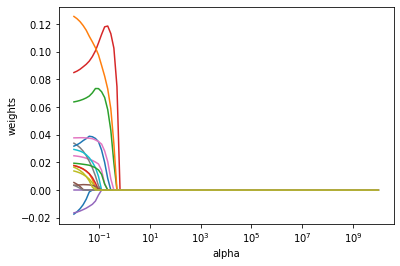

In [85]:
lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), Y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [86]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, Y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, Y_train)
print('R2 value',lasso.score(X_train, Y_train))



c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


R2 value 0.8717879358296785


In [87]:
Y_pred_lasso = lasso.predict(X_test)

In [88]:
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_lasso)))

Root Mean Square Error: 0.12543006364381848


In [89]:
from sklearn.metrics import mean_squared_error

## Ridge Regression 

In [90]:
ridge = Ridge(alpha = 4, normalize = True)
ridge.fit(X_train, Y_train)       # Fit a ridge regression on the training data
print('R2 value',ridge.score(X_train, Y_train))
  



R2 value 0.7131478067572381


In [91]:
pred_ridge = ridge.predict(X_test)  # Use this model to predict the test data
print('Mean Square Error:', mean_squared_error(Y_test, pred_ridge)) 
print('Root Mean Square Error',np.sqrt(metrics.mean_squared_error(Y_test,pred_ridge)))

Mean Square Error: 0.03781597173312611
Root Mean Square Error 0.19446329147971889


## Inference from three models
1. Linear Regression and Ridge Regression performs well on our model
2. Both the models almost have same root mean square error and R2 score
3. Lasso Regression performs moderate with R2 score of 72.909% and RMSE value is 0.222